<a href="https://colab.research.google.com/github/manjunath1005/ANN-Forward-Propagation/blob/main/Forward_Propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np

#XOR Problem using Multi Layer Neural Network(Forward Propagation)

Architecture:
2 inputs -> 2 Hidden Neutrons -> 1 Output


In [47]:
x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=[0,1,1,0]

In [48]:
w1=1
w2=1
b1=-0.5

In [49]:
w3=1
w4=1
b2=-1.5

In [50]:
w5=1
w6=-2
b3=-0.5

In [51]:
import numpy as np
def step_func(z):
  return np.where(z < 0, 0, 1)

In [52]:
for i in range(len(x)):
  h1=x[i][0]*w1+x[i][1]*w3+b1
  h2=x[i][0]*w2+x[i][1]*w4+b2
  z=step_func(h1)*w5+step_func(h2)*w6+b3
  print(f"[{x[i][0]},{x[i][1]}], h1:{step_func(h1)}, h2:{step_func(h2)}, output :{step_func(z)}")


[0,0], h1:0, h2:0, output :0
[0,1], h1:1, h2:0, output :1
[1,0], h1:1, h2:0, output :1
[1,1], h1:1, h2:1, output :0


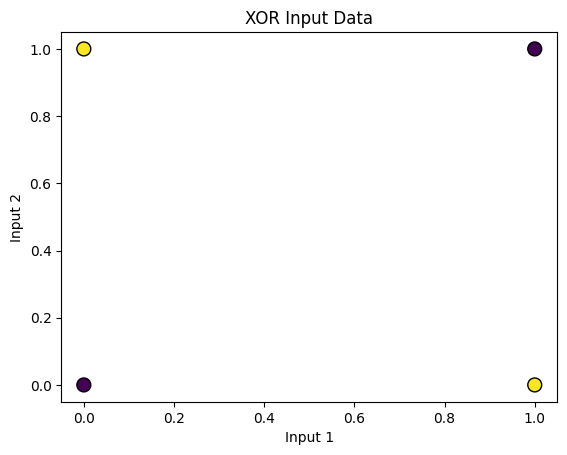

In [53]:
plt.scatter(x[:,0], x[:,1], c=y, cmap='viridis', s=100, edgecolors='k')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('XOR Input Data')
plt.show()

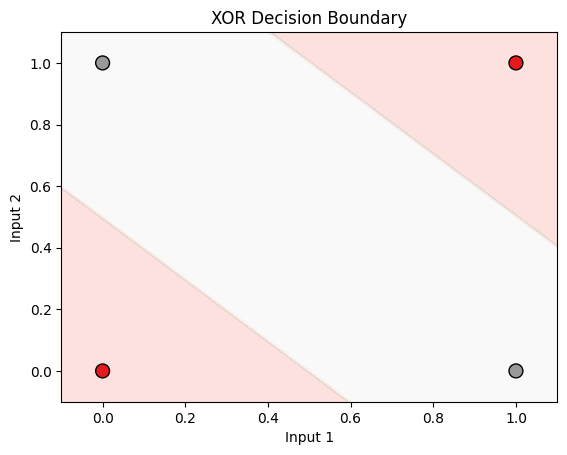

In [54]:
# Plotting the decision boundary

x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

def predict(x1_val, x2_val, w1, w2, w3, w4, w5, w6, b1, b2, b3, step_func):
    h1_val = x1_val * w1 + x2_val * w3 + b1
    h2_val = x1_val * w2 + x2_val * w4 + b2
    z_val = step_func(h1_val) * w5 + step_func(h2_val) * w6 + b3
    return step_func(z_val)

# Call predict directly with the meshgrid arrays. It will now be vectorized.
Z = predict(xx, yy, w1, w2, w3, w4, w5, w6, b1, b2, b3, step_func)

plt.contourf(xx, yy, Z, alpha=0.4, cmap='Pastel1')
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='Set1', s=100, edgecolors='k')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('XOR Decision Boundary')
plt.show()

# **Problem: Smart Loan Approval System**

A fintech company wants to automate loan approval using Al.

Each applicant has:

- x1 ->  Income Level ( 0 = Low , 1 = High)
- x2 ->  Credit Score Category (0 = Poor, 1 = Good)

Approval Rules (given by domain experts):
- If income is high AND credit score is good → Approve
- If income is low AND credit score is poor - Reject
- If one is high and the other is low- Further investigation Approve only if credit score is good

x1=[0,0,1,1]

x2=[0,1,0,1]

y=[0,1,0,1]

Upgrade the rule:

New policy:

- Approve if:

  - Income is high AND credit is good
  - OR income is low AND credit is good
- Reject if:
   - Both are poor
   - OR income high but credit poor

Now modify further:

Add business risk flag:

- X3 ->  Existing loan (0 = No, 1 = Yes)

New complex rule:

Approve if:
- Credit is good AND no existing loan
- OR Income high AND credit good

Reject otherwise.

**Part A – Architecture Design**

Design:

3 Inputs → 3 Hidden Neurons → 1 Output

Explain:

-  What feature each hidden neuron should detect.
- Why hidden layer helps.

**Part B – Forward Propagation**

In [55]:
import numpy as np
import pandas as pd

In [56]:
data = [
    [0,0,0,0],
    [0,1,0,1],
    [1,0,0,0],
    [1,1,0,1],
    [0,1,1,0],
    [1,1,1,1],
    [1,0,1,0],
    [0,0,1,0]
]

In [57]:
df = pd.DataFrame(data, columns=["x1","x2","x3","y"])
X = df[["x1","x2","x3"]].values
y = df["y"].values

In [58]:
#  Activation function
def step(z):
    return 1 if z >= 0 else 0

In [59]:
# Hidden layer weight
# n1
w1 = np.array([0,1,-1])
b1 = -0.5

# n2
w2 = np.array([1,1,0])
b2 = -1.5

# n3
w3 = np.array([0,-1,1])
b3 = -0.5

# Output neuron
w4 = np.array([1,1,-2])
b4 = -0.5

In [60]:
# Forward pass
results = []

for x in X:
    # Hidden layer
    n1 = step(np.dot(w1, x) + b1)
    n2 = step(np.dot(w2, x) + b2)
    n3 = step(np.dot(w3, x) + b3)

    hidden = np.array([n1,n2,n3])

    # Output layer
    out = step(np.dot(w4, hidden) + b4)

    results.append([*x, n1,n2,n3, out])

In [61]:
# results
res_df = pd.DataFrame(results, columns=["x1","x2","x3","n1","n2","n3","pred"])
res_df["actual"] = y

res_df

,x1,x2,x3,n1,n2,n3,pred,actual
0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,1,1
2,1,0,0,0,0,0,0,0
3,1,1,0,1,1,0,1,1
4,0,1,1,0,0,0,0,0
5,1,1,1,0,1,0,1,1
6,1,0,1,0,0,1,0,0
7,0,0,1,0,0,1,0,0
